# Les 02

## Inleiding

Dit is de werkcollege-oefening bij Les 02 van het vak *Advanced Datamining* (BFVH4DMN2). Bestudeer eerst de syllabus behorende bij deze les. Op BlackBoard kun je naast dit iPython/Jupyter notebook een tweetal Python-bestanden vinden. Sla deze op in dezelfde folder als dit notebook. Het verdient aanbeveling om voor elke les een aparte folder aan te maken.

- **model.py** bevat een opzet voor een module met object-georiënteerde implementaties van neurale netwerk algoritmen. Het doel van deze oefening is om deze code aan te vullen en uit te werken tot een correct werkend model. Open dit bestand in een code-editor naar keuze. Vergeet niet om tijdens het uitwerken van deze oefening je aanpassingen in de editor telkens op te slaan voordat je de code in dit notebook uitvoert!

- **data.py** bevat een aantal functies die helpen bij het genereren en het visualiseren van de gebruikte datasets. Deze functies hoeven maar één keer ingelezen te worden en hoef je niet te wijzigen om deze opdracht correct uit te kunnen voeren.

Laten we dus beginnen om deze functies te importeren, samen met wat initialisatie-code: plaats de cursor in de cel hieronder en druk op Shift+Enter.

In [3]:
%matplotlib inline
from importlib import reload

import model, data

## Activatie- en loss-functies

Lineaire regressie maakt gebruik van de identiteitsfunctie als activatie-functie. Van het perceptron kennen we reeds de signum-functie. Logistische regressie benut een sigmoïde functie zoals de tangens hyperbolicus. Deze functies hebben één parameter en retourneren één getalwaarde. Het zijn daarmee relatief eenvoudige functies. Implementeer deze functies op de aangegeven plaats in de module met je model. Voel je vrij ook nog andere activatie-functies toe te voegen, zoals de softsign-functie en de logistische functie die ook wel voor logistische regressie worden gebruikt (zie bv. de tabel op [Wikipedia](https://en.wikipedia.org/wiki/Activation_function#Comparison_of_activation_functions) voor een uitgebreid overzicht).

Met de code hieronder kun je je activatie-functies weergeven met behulp van de `data.graph()` functie. Controleer dat alle door jou geïmplementeerde functies de juiste verwachte vorm hebben.

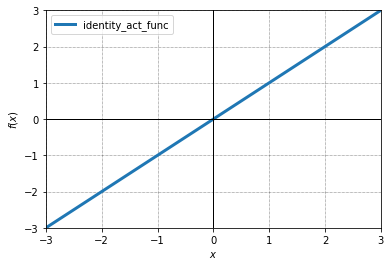

In [4]:
reload(model)

my_act_func = model.identity_act_func
data.graph(my_act_func)

Hetzelfde kunnen we doen met de loss-functies. We zijn één loss-functie tegengekomen, de kwadratische loss-functie $L\left(\hat{y};y\right)=\frac{1}{2}\left(y-\hat{y}\right)^{2}$. Implementeer ook deze op de aangegeven plaats in je module. Voeg ook een variant toe die de absolute waarde van de afwijking neemt volgens $L\left(\hat{y};y\right)=\left|y-\hat{y}\right|$. (De perceptron loss-functie mag je voorlopig nog even achterwege laten.)

Geef met de code hieronder wederom de functie weer. Merk op dat de loss-functie twee parameters heeft: $\hat{y}$ en $y$. Met `data.graph()` kun je de afhankelijkheid van de eerste parameter tonen; de tweede parameter kun je een vaste waarde meegeven. Het resultaat is dus een loss-functie die aangeeft hoe groot de loss van een instance is *met een bepaalde juiste uitkomst $y$*. Ga na dat uit de grafiek blijkt dat de loss-functie gelijk is aan nul als $\hat{y}=y$. Geldt dit ook voor de absolute loss-functie?

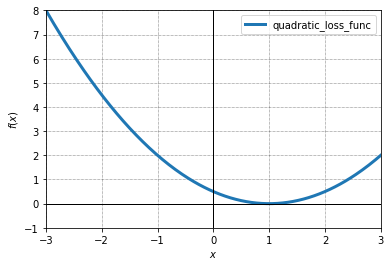

In [5]:
reload(model)

y = +1.0
my_loss_func = model.quadratic_loss_func
data.graph(my_loss_func, y)

Tenslotte is het van belang dat we kunnen werken met de afgeleiden van diverse functies. Afgeleiden zijn analytisch te bepalen door te differentiëren, maar voor het gemak zullen we hier gebruik maken van numerieke afgeleiden die je bijvoorbeeld kunt bepalen met de formule:

\begin{equation*}
\frac{\partial y}{\partial x}\approx\frac{f\left(x+\Delta x\right)-f\left(x-\Delta x\right)}{2\Delta x}
\end{equation*}

De waarde van $\Delta x$ moet voldoende klein genomen worden om de benadering kloppend te laten zijn. Deze waarde moet in elk geval zodanig klein zijn opdat de functie op die kleine schaal glad en recht oogt. Aan de andere kant moet $\Delta x$ ook voldoende groot genomen worden opdat afrondfouten niet de overhand krijgen. Immers, er worden twee op elkaar lijkende uitkomsten van de functie $f$ van elkaar afgetrokken, en dit kleine getal wordt gedeeld door de eveneens kleine waarde van $\Delta x$.

Implementeer de bovenstaande formule in de vorm van een functie `derivative`. Deze dient de afgeleide te bepalen van een zekere functie `function` die meegegeven wordt als argument. Een optioneel argument `delta_x` geeft de stapgrootte $\Delta x$ aan; kies hiervoor een geschikte (kleine, maar niet te kleine) default waarde. Als return-value dient deze zelf ook weer een functie te retourneren die de afgeleide van de gespecificeerde functie bevat. Dit komt er ongeveer als volgt uit te zien (waarbij de functie `gradient` de afgeleide functie is):

```
def derivative(function, delta_x=...):

    def gradient(x):
        # Hier kun je o.a. "function(x)" aanroepen om de afgeleide mee te berekenen
        return ...
        
    return gradient
```

De functie `derivative()` heeft als hoofdzakelijke doel om een verwijzing te retourneren naar de functie-definitie van `gradient()` die in diens body genest is. De functie `gradient()` berekent de afgeleide van een willekeurige door de gebruiker te specificeren functie `function`.

Controleer dat de onderstaande code correct zowel de functie (in blauw) als diens afgeleide (in oranje) weergeeft. Probeer ook andere activatie-functies uit.

In [14]:
reload(model)

my_act_func = model.identity_act_func
my_act_grad = model.derivative(my_act_func)
data.graph([my_act_func, my_act_grad])

Omdat sommige functies ook nog andere parameters verwachten dient de resulterende functie `gradient()` dergelijke extra parameters te kunnen verwerken. Zo dient bijvoorbeeld de loss-functie naast het argument `y_hat` ook een extra argument `y` te ontvangen. Dat betekent dat ook de afgeleide `gradient()` functie naast het argument `y_hat` die extra argumenten moet meekrijgen. Gebruik hiervoor de `*args` notatie.

```
def derivative(function, delta_x=...):

    def gradient(x, *args):
        # Hier kun je o.a. "function(x, *args)" aanroepen om de afgeleide mee te berekenen
        return ...
        
    return gradient
```

Merk op: de partiële afgeleide wordt alleen bepaald naar het eerste argument, hier `x`; de andere argumenten wordt hetzelfde gehouden.

Verifieer dat de onderstaande code correct zowel de functie (in blauw) als diens afgeleide (in oranje) weergeeft. De loss-functie dient in dit geval dus weer te geven hoe groot de loss is voor een instance met een gegeven uitkomst $y$. Ga na dat de loss-functie een minimum heeft als $\hat{y}=y$, wat betekent dat ook de afgeleide daar door nul gaat. Geldt dit ook voor de absolute loss-functie?

In [27]:
reload(model)

y = +1.0
my_loss_func = model.quadratic_loss_func
my_loss_grad = model.derivative(my_loss_func)
data.graph([my_loss_func, my_loss_grad], y)

## Lineaire regressie

We gaan de implementaties van het perceptron en lineaire regressie uit Les 01 aanpassen. We zullen deze daarbij generaliseren tot één class genaamd `Neuron()`. Deze class krijgt tijdens diens instantiatie parameters mee die bepalen wat de te gebruiken activatie- en loss-functies zullen zijn. Door hier geschikte waarden voor mee te geven kan met één en hetzelfde model dus zowel classificatie als regressie worden uitgevoerd!

Laten we eerst een kijkje nemen naar de data. De functie `data.generate()` produceert net als in Les 01 een verzameling willekeurige instances met continue attributen. Voorlopig kiezen we voor continue uitkomsten t.b.v. regressie middels de parameter `nominal=False`. De functie retourneert een lijst met vectoren die de attributen van de instances bevat en een lijst met klasselabels danwel getalwaarden die de bijbehorende uitkomsten bevat.

We gaan nu ook gebruik maken van een extra parameter genaamd `noise`. Als deze groter dan nul wordt gekozen dan zullen de datapunten willekeurig enigszins worden verplaatst, waardoor ze niet langer lineair separabel hoeven te zijn of niet meer exact een lineair model zullen volgen. Experimenteer hieronder met deze parameter om een idee te krijgen van diens effect. Vergelijk bijvoorbeeld de instelling `noise=0.0` met `noise=10.0`; wat valt je daarbij op aan de resulterende datasets?

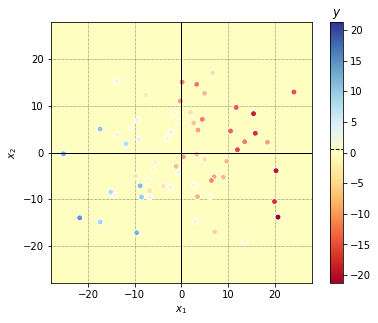

In [21]:
xs, ys = data.generate(nominal=False, noise=5.0)
data.scatter(xs, ys)

De weergave-methode `__str__()` is reeds geïmplementeerd; je hoeft deze niet te veranderen, maar voel je vrij om de informatie over een object uit te breiden of anders weer te geven. Wel dien je de instantiatie-methode `__init__()` te implementeren. We onderscheiden voor ons generieke model wederom de bias $b$ en gewichten $\boldsymbol{w}$. Daarnaast zullen zoals gezegd de activatie- en loss-functies moeten worden toegekend. Bekijk de methode `__str__()` om te zien welke variabelen in elk geval definieerd dienen te zijn.

Als het goed is kun je nu zonder foutmeldingen een nieuw object instantiëren en weergeven. Controleer dat de bias en gewichten juist zijn geinitialiseerd. Probeer ook uit of het neuron met een andere activatie- of loss-functie kan worden geïnstantieerd.

In [24]:
reload(model)

my_neuron = model.Neuron(act_func=model.identity_act_func, loss_func=model.quadratic_loss_func)
print(my_neuron)

Neuron():
  - bias = 0
  - weights = [0.0, 0.0]
  - act_func = <function identity_act_func at 0x000001C78EC4BB70>
  - loss_func = <function quadratic_loss_func at 0x000001C78EC4BA60>


De volgende stap is om de code te schrijven die voor een gegeven instance een voorspelling kan doen van de juiste uitkomst op grond van het model van het neuron:

\begin{equation*}
\hat{y}=\varphi\left(b+\sum_{i}w_{i}\cdot x_{i}\right)
\end{equation*}

waarin $\varphi$ de activatie-functie aangeeft. De methode `predict(self, x)` heeft een parameter die de attributen van een instance ontvangt en dient een waarde te retourneren die overeenkomt met het resultaat van de bovenstaande formule.

We voegen meteen ook een nieuwe methode `loss(self, x, y)` toe die de loss berekent van een instance en de bijbehorende voorspelling. Deze wordt bepaald middels $l=L\left(\hat{y};y\right)$; $\hat{y}$ wordt berekend uit het model, en $y$ wordt door de gebruiker gegeven.

Als je deze code correct hebt geïmplementeerd zou je hieronder de data gevisualiseerd moeten zien op soortgelijke wijze als hierboven. Als het goed is wordt boven de figuur nu ook de totale loss van alle instances opgeteld weergegeven.

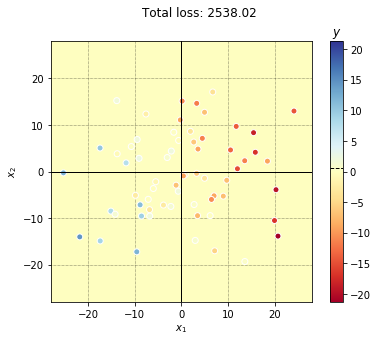

In [34]:
reload(model)

my_neuron = model.Neuron(act_func=model.identity_act_func, loss_func=model.quadratic_loss_func)
data.scatter(xs, ys, model=my_neuron)

Vervolgens gaan we het neuron trainen op grond van één instance met gegeven attributen en klasselabel. Gebruik hiervoor de update-regel:

\begin{equation*}
\left\{ \begin{array}{c}
b\leftarrow b+\alpha\cdot\frac{\partial l}{\partial\hat{y}}\cdot\frac{\partial\hat{y}}{\partial a}\\
w_{i}\leftarrow w_{i}+\alpha\cdot\frac{\partial l}{\partial\hat{y}}\cdot\frac{\partial\hat{y}}{\partial a}\cdot x_{i}
\end{array}\right.
\end{equation*}

De verschillende afgeleiden kun je natuurlijk bepalen met de eerder gedefinieerde `derivative()` functie. $\frac{\partial l}{\partial\hat{y}}$ bevat de afgeleide van de loss-functie; $\frac{\partial\hat{y}}{\partial a}$ bevat de afgeleide van de activatie-functie; 

De methode `train(self, x, y, alpha=0)` heeft naast de attributen en de uitkomst ook de learning rate als parameter. Deze heeft nu een default waarde $\alpha=0$, maar dit is niet zo zinvol. Vervang deze door een redelijkere waarde.

Na het trainen met één instance wordt het model nog maar weinig aangepast, maar als we een nogal grote learning rate $\alpha=0.05$ kiezen zou er toch een gradiënt in de achtergrond zichtbaar kunnen worden. De diagonale stippellijn geeft aan waar de voorspelling $\hat{y}=0$; deze scheidt dus de instances met een voorspelde positieve uitkomst van die met een voorspelde negatieve uitkomst. Op dit moment hoeven de voorspellingen natuurlijk nog niet met de data overeen te komen. De loss kan zelfs verslechterd zijn vergeleken met het nog niet getrainde model hierboven!

In [49]:
reload(model)

my_neuron = model.Neuron(act_func=model.identity_act_func, loss_func=model.quadratic_loss_func)
my_neuron.train(xs[0], ys[0], alpha=0.05)
data.scatter(xs, ys, model=my_neuron)

De laatste methode die geïmplementeerd dient te worden heet `fit(self, xs, ys, alpha=0, epochs=100)`. Deze dient de hele dataset te gebruiken om het neuron te trainen. Er dient een extra argument te worden meegegeven dat het aantal te draaien epochs definieert; default draaien we er 100. Pas ook de standaardwaarde van de learning rate $\alpha$ weer aan.

Draai de code hieronder. Slaagt je model erin om te convergeren naar een uitkomst die de echte getalwaarden van de instances ogenschijnlijk goed voorspelt? Is de loss nu wel afgenomen?

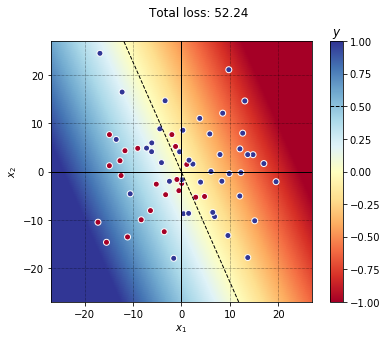

Neuron():
  - bias = -0.002055390011652269
  - weights = [-0.04063629600483917, -0.01790168347416117]
  - act_func = <function identity_act_func at 0x000001C78EA44488>
  - loss_func = <function quadratic_loss_func at 0x000001C78EBEB158>


In [52]:
reload(model)

my_neuron = model.Neuron(act_func=model.identity_act_func, loss_func=model.quadratic_loss_func)
my_neuron.fit(xs, ys)
data.scatter(xs, ys, model=my_neuron)
print(my_neuron)

## Logistische regressie & het perceptron

Als het goed is kan je met dit model ook classificatie uitvoeren in plaats van regressie. We hoeven daartoe alleen nog maar de activatie-functie te veranderen, en "klaar is Kees".

Ogenschijnlijk kun je het perceptron implementeren door de signum-functie als activatiefunctie te kiezen, maar helaas heeft deze geen geschikte afgeleide (de helling is altijd ofwel nul, ofwel oneindig). Dit probleem kan op meerdere manieren opgelost worden.

De eerste manier is door niet de signum-functie als activatie-functie te kiezen, maar een afgevlakte sigmoïde functie te nemen. Een voorbeeld hiervan is de tanh-functie. Deze lost zowel het probleem van helling nul als van helling oneindig op, aangezien deze overal een positieve maar eindige helling heeft. Het resultaat is logistische regressie.

Hieronder wordt een dataset gefit met de tanh-activatiefunctie. De overgang tussen de klassen is door deze afgevlakte functie niet zo scherp als bij het perceptron, maar voor data die niet lineair separabel zijn is dit juist zinvol omdat hiermee aangegeven kan worden dat de classificatie nabij de grenslijn enigszins onzeker is.

Kijk of de code correct functioneert; je hoeft hiertoe als het goed is geen extra functies meer te implementeren. Is de gevonden scheidingslijn zo goed mogelijk in staat om de datapunten te onderscheiden?

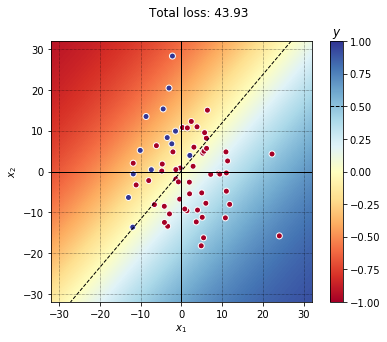

Neuron():
  - bias = 0.003815305891960011
  - weights = [0.026161278584997383, -0.022125533676991327]
  - act_func = <function tanh_act_func at 0x000001C7902F7158>
  - loss_func = <function quadratic_loss_func at 0x000001C7902FE400>


In [56]:
reload(model)

xs, ys = data.generate(nominal=True, noise=5.0)
my_neuron = model.Neuron(act_func=model.tanh_act_func, loss_func=model.quadratic_loss_func)
my_neuron.fit(xs, ys)
data.scatter(xs, ys, model=my_neuron)
print(my_neuron)

De tweede manier om het genoemde probleem op te lossen is door de activatie- en loss-functies allebei te herschrijven. Het blijkt dat met een activatiefunctie gelijk aan de identiteitsfunctie en een loss-functie gelijk aan $L\left(\hat{y};y\right)=\max\left(-\hat{y}\cdot y,0\right)$ een model verkregen wordt dat tot precies dezelfde update-regels leidt als het perceptron. De voorspelling $\hat{y}$ kan nu echter elke getalwaarde aannemen; een positieve uitkomst duidt dan op de klasse $y=+1$ en een negatieve uitkomst op de klasse $y=-1$.

Implementeer de bovenstaande loss-functie als `perceptron_loss_func`. Omdat het perceptron alleen gegarandeerd convergeert voor lineair separabele data passen we dit model hieronder toe op een nominale dataset zonder extra ruis.

Slaagt het model erin om binnen de gegeven 100 epochs te convergeren naar een exacte oplossing zoals aangegeven door de stippellijn? Hoe groot is de uiteindelijk bereikte totale loss over alle instances?

In [55]:
reload(model)

xs, ys = data.generate(nominal=True, noise=0.0)
my_neuron = model.Neuron(act_func=model.identity_act_func, loss_func=model.perceptron_loss_func)
my_neuron.fit(xs, ys)
data.scatter(xs, ys, model=my_neuron)
print(my_neuron)

Neuron():
  - bias = -0.0020969659649435176
  - weights = [-0.019252069239858605, -0.033544378847076256]
  - act_func = <function identity_act_func at 0x000001C7902FEF28>
  - loss_func = <function perceptron_loss_func at 0x000001C78C631AE8>


**Gefeliciteerd!** Je hebt nu één enkel algoritme geïmplementeerd dat op velerlei manieren zowel classificatie als regressie kan uitvoeren.

Experimenteer weer hoe het algoritme zich gedraagt. Bijvoorbeeld:

- Hoe gevoelig zijn de uitkomsten van respectievelijk lineaire regressie, logistische regressie, en het perceptron voor de waarde van de `noise`-parameter?

- Hoe varieert de convergentie van de methode als je de learning rate $\alpha$ verandert?

- Hoe goed werken andere combinaties van activatie- en loss-functies?

- Hoe functioneert logistische regressie met de identiteits-functie als activatiefunctie en de softplus-functie als loss-functie, zoals genoemd in de Syllabus bij deze les?

- Wat gebeurt er als je lineaire regressie uitvoert op nominale data, of omgekeerd logistische regressie of het perceptron op continue data?